To start; import the folowing things:

In [1]:
#Setting up the modules to study the experiment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data of the experiment
data = pd.read_csv('data1bis50.csv')
data.head()

,time,boid,speed,x,y,z,theta,phi,drone
0,0,0,0.005,0.271500,0.987671,0,1.5708,1.144730,0
1,0,1,0.005,0.882835,0.909081,0,1.5708,1.169260,0
2,0,2,0.005,0.302032,0.614838,0,1.5708,2.793710,0
3,0,3,0.005,0.179016,0.608002,0,1.5708,0.903377,0
4,0,4,0.005,0.375244,0.017426,0,1.5708,4.351260,0


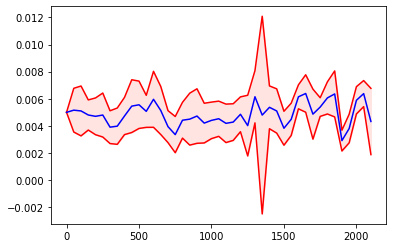

In [2]:
δ = 1.

S = data[["time","speed"]].groupby("time").mean().reset_index().to_numpy()
t = S[:,0]
S = S[:,1]
ΔS= data[["time","speed"]].groupby("time").std( ).to_numpy()[:,0]
S_p = S + δ * ΔS
S_m = S - δ * ΔS


plt.fill_between(t, S_p, S_m, color="mistyrose")
plt.plot(t,S_p, "red")
plt.plot(t,S_m, "red")
plt.plot(t,S, "blue")

Text(0.5, 0, 'speed')

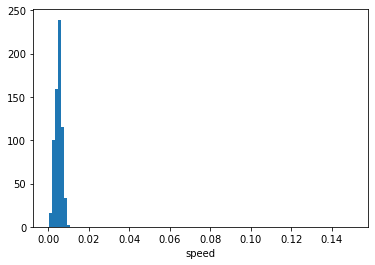

In [3]:
#d=data[data.time!=0].speed.hist(bins=100)
plt.hist(data.speed[data.time !=0],bins=100,density=True,range=(np.min(data.speed), np.max(data.speed)))
plt.xlabel("speed")
#trace la distribution de vitesse moyennée sur l'acquisition

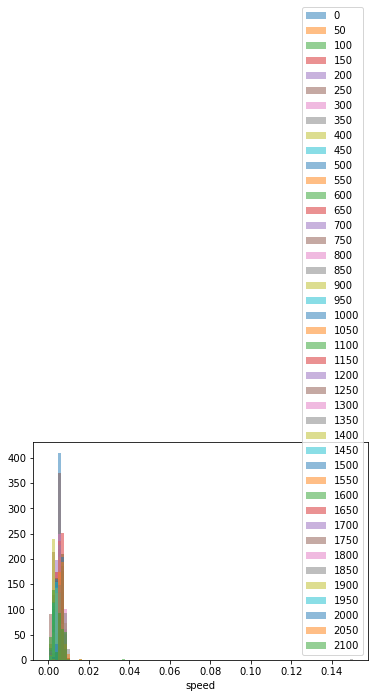

In [4]:
#trace la distrib de vitesse à chaque temps.
for time in data.time.unique():
    plt.hist(data.speed[data.time == time],alpha=0.5,bins=100,density=False,label=time,range=(np.min(data.speed), np.max(data.speed)))
    plt.xlabel("speed")
    plt.legend()



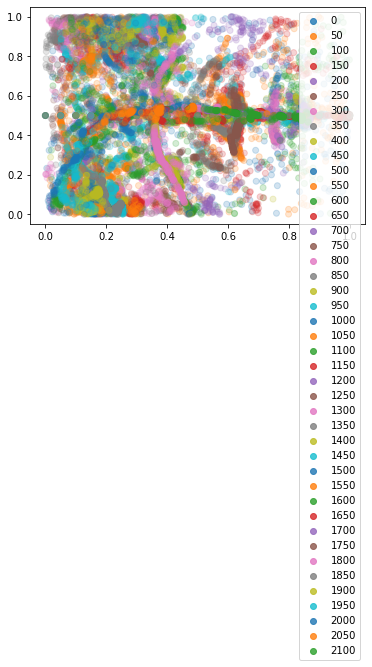

In [5]:
#plot la position de chaque oiseau à chaque temps : une couleur= un temps
import numpy as np
df = pd.read_csv("data1bis50.csv")
for i, time in enumerate(df.time.unique()):
    df.loc[df.time == time, "colors"] = f"C{i}"
    
plt.scatter(df.x, df.y, c=df["colors"], alpha=0.2)
for i, time in enumerate(df.time.unique()):
    plt.scatter([], [], c="C{}".format(i), alpha=0.8, label=time)
plt.legend();    
    

    
    
    




NameError: name 'axs' is not defined

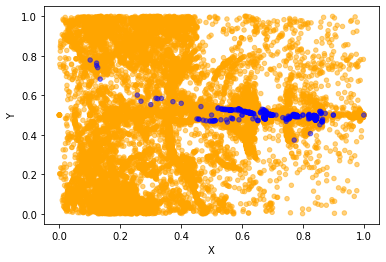

In [6]:
    colors = np.where(df.time == time, "blue","orange")
axs[0] =df.plot.scatter(
    x="x",
    y="y",
    c=colors,
    alpha=0.5,
    loglog=False,
    xlabel="X",
    ylabel="Y",)

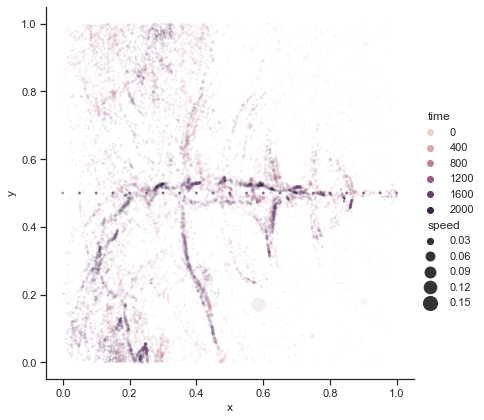

In [7]:
#plot la position de chaque oiseau à chaque temps : une couleur= un temps et la taille correspond à la vitesse de l'oiseau
import seaborn as sns

sns.set_theme(style="ticks")

DT = pd.read_csv("data1bis50.csv")

g = sns.relplot(
    data=DT,
    x="x",
    y="y",
    hue="time",
    size="speed",
    alpha=0.09,
    sizes=(0, 200),
    height=6,
)
g.set(xlabel="x", ylabel="y");

Text(0.5, 0, 'phi')

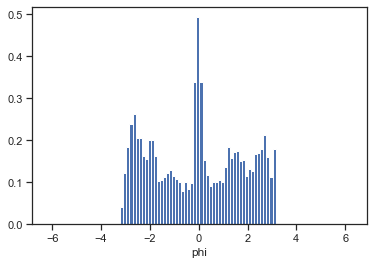

In [8]:
#PHI DISTRIB WITH DRONES COUNTED IN THE DISTRIB
D=data
plt.hist(D.phi[D.time !=0],bins=100,density=True,range=(np.min(D.phi), np.max(D.phi)))
plt.xlabel("phi")

Text(0.5, 0, 'phi')

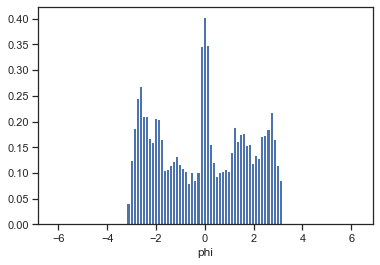

In [9]:
#PHI DISTRIB WITHOUT DRONES COUNTED IN THE DISTRIB
D=data[data.drone==0]
plt.hist(D.phi[D.time !=0],bins=100,density=True,range=(np.min(D.phi), np.max(D.phi)))
plt.xlabel("phi")

Text(0.5, 0, 'phi')

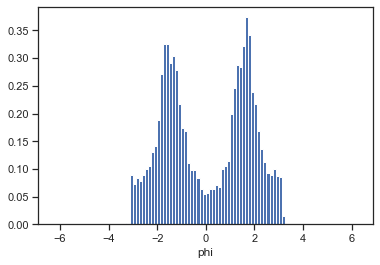

In [10]:
#PHI DISTRIB IN THE SIMULATION WITHOUT DRONES
NODRONE=pd.read_csv("data2bis50.csv")
plt.hist(NODRONE.phi[NODRONE.time !=0],bins=100,density=True,range=(np.min(NODRONE.phi), np.max(NODRONE.phi)))
plt.xlabel("phi")

Text(0.5, 0, 'speed')

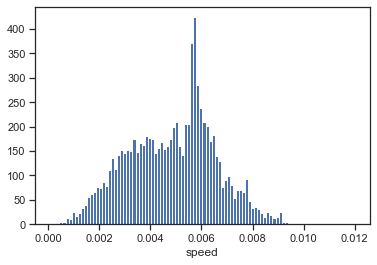

In [11]:

D=data[data.drone==0]
plt.hist(D.speed[D.time !=0],bins=100,density=True,range=(np.min(D.speed), 0.012))
plt.xlabel("speed")
#trace la distribution de vitesse moyennée sur l'acquisition

Text(0.5, 0, 'speed')

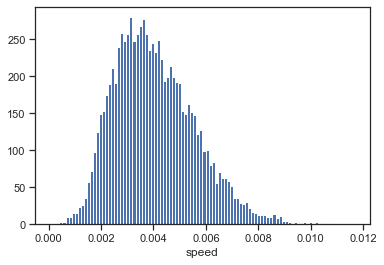

In [12]:
#SPEED DISTRIB IN THE SIMULATION WITHOUT DRONES
plt.hist(NODRONE.speed[NODRONE.time !=0],bins=100,density=True,range=(np.min(NODRONE.speed), np.max(NODRONE.speed)))
plt.xlabel("speed")
#trace la distribution de vitesse moyennée sur l'acquisition

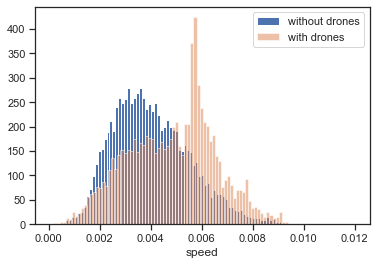

In [13]:
plt.hist(NODRONE.speed[NODRONE.time !=0],bins=100,density=True,label="without drones",range=(np.min(NODRONE.speed), np.max(NODRONE.speed)))
plt.hist(D.speed[D.time !=0],alpha=0.5,bins=100,density=True,label="with drones",range=(np.min(data.speed), 0.012))
plt.xlabel("speed")
plt.legend()


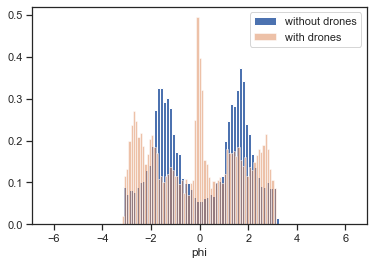

In [14]:
plt.hist(NODRONE.phi[NODRONE.time !=0],bins=100,density=True,label="without drones",range=(np.min(NODRONE.phi), np.max(NODRONE.phi)))
plt.hist(D.phi[D.time !=0],alpha=0.5,bins=100,density=True,label="with drones",range=(np.min(data.phi), 3.14))
plt.xlabel("phi")
plt.legend()


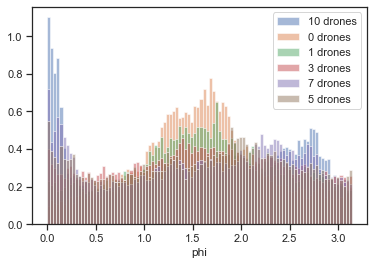

In [20]:
L=[]
L.append(pd.read_csv("data1bis50.csv"))
L.append(pd.read_csv("data2bis50.csv"))
L.append(pd.read_csv("data3.csv"))
L.append(pd.read_csv("data4.csv"))
L.append(pd.read_csv("data5.csv"))
L.append(pd.read_csv("data6.csv"))
NAME=["10 drones","0 drones","1 drones","3 drones","7 drones","5 drones"]
n=len(L)
for i in range(n):
    L[i]['absphi']=L[i]['phi'].abs()

for i in range(n):
    plt.hist(L[i].absphi[L[i].time !=0],alpha=0.5,bins=100,density=True,label=NAME[i],range=(0, 3.14))

    
plt.xlabel("phi")
plt.legend()
    

<ErrorbarContainer object of 3 artists>

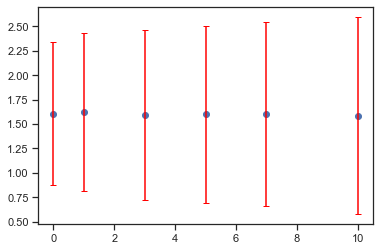

In [30]:
NDRONES=[10,0,1,3,7,5]
MEAN_PHI=[]
STD_PHI=[]
for i in range(n):
    MEAN_PHI.append(L[i].absphi.mean())
    STD_PHI.append(L[i].absphi.std())
plt.scatter(NDRONES,MEAN_PHI)
plt.errorbar(NDRONES,MEAN_PHI,yerr=STD_PHI,fmt="none",ecolor="red",markersize=5,capsize=3)